In [3]:
import pandas as pd

data = pd.read_csv('data/nd2.csv')

data = data.drop(['Unnamed: 0'], axis=1)


In [5]:

data['Опыт работы (год)'] = data['Опыт работы (месяц)'] / 12

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44744 non-null  object 
 1   Последнее/нынешнее место работы  44743 non-null  object 
 2   Последняя/нынешняя должность     44742 non-null  object 
 3   Обновление резюме                44744 non-null  object 
 4   Авто                             44744 non-null  object 
 5   Образование                      44744 non-null  object 
 6   Пол                              44744 non-null  object 
 7   Возраст                          44744 non-null  int64  
 8   Город                            44744 non-null  object 
 9   Готовность к переезду            44744 non-null  bool   
 10  Готовность к командировкам       44744 non-null  bool   
 11  полная занятость                 44744 non-null  bool   
 12  частичная занятост

In [9]:

dupl_columns = list(data.columns)
mask = data.duplicated(subset=dupl_columns)
ddups = data[mask]
print(f'Duplicates: {ddups.shape[0]}')


Duplicates: 161


In [10]:
ddata = data.drop_duplicates(subset=dupl_columns)
ddata.shape[0]

44583

In [14]:
ddata['Опыт работы (месяц)'].isna().sum()

168

In [15]:
ddata.head()

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Город,Готовность к переезду,...,стажировка,волонтерство,гибкий график,полный день,сменный график,удаленная работа,вахтовый метод,ЗП (руб),Опыт работы (месяц),Опыт работы (год)
0,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2019-04-16,Имеется собственный автомобиль,Неоконченное высшее,М,39,Другие,False,...,False,False,True,True,True,True,True,29000.0,202.0,16.833333
1,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",2019-12-04,Не указано,Высшее образование,М,60,Другие,False,...,False,False,True,True,True,True,False,40000.0,233.0,19.416667
2,Оператор,ПАО Сбербанк,Кассир-операционист,2019-04-16,Не указано,Среднее специальное,Ж,36,Другие,False,...,False,False,False,True,False,False,False,20000.0,123.0,10.250000
3,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,2019-08-04,Не указано,Высшее образование,М,38,Другие,False,...,False,False,True,False,False,True,False,100000.0,225.0,18.750000
4,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,2019-04-22,Не указано,Высшее образование,Ж,26,Москва,False,...,False,False,False,True,False,False,False,140000.0,67.0,5.583333


In [18]:
ddata['Последнее/нынешнее место работы'].isna().sum()

1

In [19]:
ddata['Последняя/нынешняя должность'].isna().sum()

2

In [23]:
th = ddata.shape[0]
ddata.dropna(how='any', thresh=th, axis=1)
ddata.shape

(44583, 24)

In [27]:
ddata['Опыт работы (месяц)'].isna().sum()

168

In [29]:
values = {
    'Опыт работы (месяц)': ddata['Опыт работы (месяц)'].median()  
}

ddata = ddata.fillna(values)
ddata['Опыт работы (месяц)'].isna().sum()

0

In [30]:
ddata['Опыт работы (месяц)'].mean()

114.3530493685934

In [39]:
print(ddata[ddata['ЗП (руб)'] > 1e6].shape[0])

5


In [40]:
display(ddata[ddata['ЗП (руб)'] < 1000])

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Город,Готовность к переезду,...,стажировка,волонтерство,гибкий график,полный день,сменный график,удаленная работа,вахтовый метод,ЗП (руб),Опыт работы (месяц),Опыт работы (год)
253,Руководитель аналитики/crm/data science,РОСБАНК,Head of analytics and reporting in CRM,2019-10-04,Не указано,Высшее образование,М,34,Москва,True,...,False,False,False,True,False,False,False,420.0000,154.0,12.833333
514,"Oracle DBA, системный инженер",Банк,эксперт,2019-04-19,Не указано,Высшее образование,М,37,Москва,False,...,False,False,True,True,True,True,False,160.0000,162.0,13.500000
552,3D художник,ООО «Центр технологий и медиа групп»,3D-дизайнер,2019-04-26,Не указано,Высшее образование,М,27,Другие,True,...,True,True,True,True,True,True,True,452.7558,48.0,4.000000
1087,"Директор по продукту {Internet, Blockchain}",EXSCUDO,Директор по продукту,2019-04-26,Не указано,Высшее образование,М,36,Москва,True,...,False,False,False,True,False,False,False,1.0000,142.0,11.833333
2248,"Электромонтер КИПиА, электромеханик, IT, сеть ...","СК ""Град""","Электромонтажник, ОПС, разнорабочий, стропольщик.",2019-04-16,Не указано,Среднее образование,М,31,Другие,True,...,True,False,True,True,True,True,True,250.0000,62.0,5.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41742,web-дизайнер,Monstrptint.ru,Дизайнер. Криэйтор.,2019-08-04,Не указано,Высшее образование,Ж,44,Москва,False,...,False,False,False,False,False,True,False,45.0000,149.0,12.416667
42329,Инженер- программист,"OZON.ru, Интернет-магазин",Разработчик информационных систем,2018-05-12,Не указано,Неоконченное высшее,М,29,Москва,True,...,False,False,False,True,False,True,False,140.0000,103.0,8.583333
42841,Ведущий системный администратор,"ГАЗИНФОРМСЕРВИС, ООО",Старший инженер,2019-04-22,Не указано,Высшее образование,М,32,Санкт-Петербург,False,...,False,False,False,True,True,False,False,85.0000,114.0,9.500000
43385,Директор по управлению проектами / Директор по...,One Agile,Исполнительный директор,2019-07-05,Не указано,Высшее образование,М,46,Москва,True,...,False,False,False,True,False,False,False,1.0000,282.0,23.500000


In [41]:
outly = ddata[(ddata['ЗП (руб)'] > 1e6) | (ddata['ЗП (руб)'] < 1e3)]
ddata = ddata.drop(outly.index)
print(outly.shape[0])

89


In [42]:
ddata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44494 entries, 0 to 44743
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44494 non-null  object 
 1   Последнее/нынешнее место работы  44493 non-null  object 
 2   Последняя/нынешняя должность     44492 non-null  object 
 3   Обновление резюме                44494 non-null  object 
 4   Авто                             44494 non-null  object 
 5   Образование                      44494 non-null  object 
 6   Пол                              44494 non-null  object 
 7   Возраст                          44494 non-null  int64  
 8   Город                            44494 non-null  object 
 9   Готовность к переезду            44494 non-null  bool   
 10  Готовность к командировкам       44494 non-null  bool   
 11  полная занятость                 44494 non-null  bool   
 12  частичная занятост

In [77]:
outlier = ddata[ddata['Опыт работы (год)'] > ddata['Возраст']]
outlier.shape[0]
ddata = ddata.drop(outlier.index)



In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Город,Готовность к переезду,...,стажировка,волонтерство,гибкий график,полный день,сменный график,удаленная работа,вахтовый метод,ЗП (руб),Опыт работы (месяц),Опыт работы (год)
31137,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-06-04,Не указано,Среднее образование,М,15,Санкт-Петербург,False,...,False,False,True,False,True,True,False,10000.0,2.0,0.166667
32950,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,2019-09-04,Не указано,Среднее специальное,М,15,Другие,False,...,False,False,False,True,False,False,False,2000.0,3.0,0.250000
33654,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,Среднее специальное,М,100,Санкт-Петербург,False,...,True,False,True,True,False,True,False,60000.0,30.0,2.500000


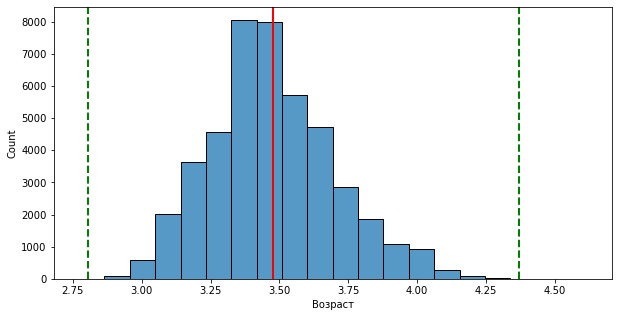

In [78]:
def outzes(data, feature, log_scale=True, left=3, right=3):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - (left * sigma)
    upper_bound = mu + (right * sigma)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned


fig, ax = plt.subplots(1, 1, figsize=(10, 5))
log_age = np.log(ddata['Возраст']+1)
histplot = sns.histplot(log_age, bins=20, ax=ax)
histplot.axvline(log_age.mean(), color='r', lw=2)
histplot.axvline(log_age.mean() + 4 * log_age.std(), color='g', ls='--', lw=2)
histplot.axvline(log_age.mean() - 3 * log_age.std(), color='g', ls='--', lw=2)
outliers, cleaned = outzes(ddata, 'Возраст', right=4)
display(outliers)

#Распределение ассимитрично в левую сторону

4


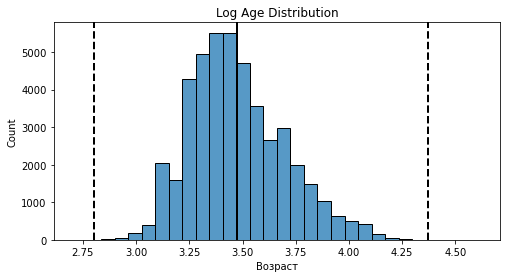

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_age = np.log(data['Возраст'] + 1)
histplot = sns.histplot(log_age, bins=30, ax=ax)
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(log_age.mean()+ 4 *log_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_age.mean()- 3 *log_age.std(), color='k', ls='--', lw=2)
histplot.set_title('Log Age Distribution');

def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned
outliers, data = outliers_z_score_mod(data, 'Возраст', left=3,  right=4, log_scale=True)
print(outliers.shape[0])